In [1]:
import Min_vertex_cover as mvc
import networkx as nx
import rustworkx as rx
import csv
import tensorflow as tf
import matplotlib.pyplot as plt

import pennylane as qml
from pennylane.wires import Wires
from pennylane import numpy as np
from pennylane import qaoa


In [12]:
edges = [(0,i) for i in range(1,7)]
graph = nx.Graph(edges)


In [13]:
cost = mvc.cost_h(graph,1)
mixer = mvc.bit_flip_mixer(graph,1)
def qaoa_layer(gamma, beta):
    qaoa.cost_layer(gamma, cost)
    qaoa.mixer_layer(beta, mixer)

wires = (graph.nodes())
depth = 2

def circuit(params, **kwargs):
    qml.PauliX(wires=0)
    qml.PauliX(wires=5)
    qml.layer(qaoa_layer, depth, params[0],params[1])

dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)


def exp_values(cost_h,mixer_h):
    bet   = np.arange(0,2*np.pi,0.01)
    gam   = np.linspace(1,1,np.size(bet))
    res   = []
    for i in range(np.size(bet)):
        params = np.array([[gam[i]],[bet[i]]])
        res   += [cost_function(params)]
    return res

In [14]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost)

In [15]:
optimizer = qml.GradientDescentOptimizer()
steps = 100
params = np.array([[0.5,0.5], [0.5,0.5]], requires_grad=True)

In [16]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

Optimal Parameters
[[5.00000000e-01 7.30709841e-01]
 [2.14023573e-09 2.11928282e-09]]


In [17]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

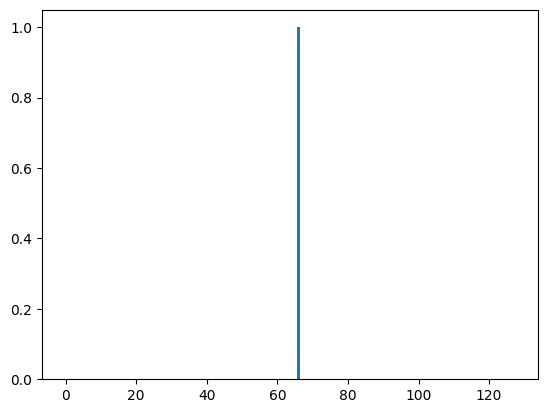

In [18]:
import matplotlib.pyplot as plt
plt.bar(range(2 ** len(wires)), probs)
plt.show()


In [27]:
np.where(probs == max(probs))

(array([66]),)

In [18]:
max(probs)

tensor(1., requires_grad=True)

In [20]:
def qaoa_layer(gamma, beta):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(beta, mixer_h)

wires = range(len(graph.nodes()))
depth = 1

def circuit(params, **kwargs):
    for w in wires:
        qml.PauliX(wires=w)
    qml.layer(qaoa_layer, depth, params[0],params[1])

dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)


def exp_values(cost_h,mixer_h):
    bet   = np.arange(0,2*np.pi,0.01)
    gam   = np.linspace(1,1,np.size(bet))
    res   = []
    for i in range(np.size(bet)):
        params = np.array([[gam[i]],[bet[i]]])
        res   += [cost_function(params)]
    return res

In [ ]:
cost_h = mvc.cost_h(graph,1)

mixer_h_1 = mvc.bit_flip_mixer(graph,1)
mixer_h = mixer_h_1
exp_value_1 = exp_values(cost_h,mixer_h_1)

In [ ]:
off_set = len(graph.nodes())/2
c = []
for a in exp_value_1:
    c += [a.numpy()]
c = np.array(c)
c = c/2+off_set

d = []
for b in exp_value_2:
    d +=[b.numpy()]
    
d = np.array(d)
d = d/2 +off_set

e = []
for b in exp_value_3:
    e +=[b.numpy()]
    
e = np.array(e)
e = e/2 + off_set

In [ ]:
import matplotlib.pyplot as plt
bet   = np.arange(0,2*np.pi,0.01)
plt.plot(bet,c,'r',label = 'H_M1')
#plt.plot(bet,d,'b',label = 'H_M2')
#plt.plot(bet,e,'g',label = 'H_M3')
plt.plot(bet,np.linspace(np.mean(c),np.mean(c),np.size(bet)),'r')
#plt.plot(bet,np.linspace(np.mean(d),np.mean(d),np.size(bet)),'b')
#plt.plot(bet,np.linspace(np.mean(e),np.mean(e),np.size(bet)),'g')
plt.xlabel('beta')
plt.ylabel('F(beta)')
plt.title(f'F(beta) vs beta for graph P_{int(2*off_set)} graph')
plt.legend()
plt.savefig(f'Results/Path-{int(2*off_set)}.png')
plt.show()